# Trabalho Prático 3
## ISEL - LEIM

## Docente - Gonçalo Marques

### Trabalho realizado por:
Mª Luísa Melo e Sampaio Nº50799
André Alves Nº
Carlos Ceita Nº50950

In [16]:
#imports
from time import time
from os import path
import numpy as np
import cv2
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

### Exercicio 1

In [17]:
def gen_huff_table(simbolos):
    """Função que cria a tabela de códigos de Huffman a partir de um dicionário 

    Args:
        simbolos (dicionário): dicionário com as frequências de cada letra

    Returns:
        dicionário
    """
    # Criar heap de nós: [peso, [[símbolo, código]]]
    heap = [[peso, [[simbolo, ""]]] for simbolo, peso in simbolos.items()]
    heapq.heapify(heap) # transformar lista em heap, organizar como min-heap

    # Construir árvore de Huffman
    while len(heap) > 1: # enquanto houver mais de um nó (porque fundimos dois de cada vez)
        # remover dois nos com menor peso no heap
        peso_lo, lista_lo = heapq.heappop(heap) 
        peso_hi, lista_hi = heapq.heappop(heap)

        # Prefixos: 0 para o ramo de menor peso, 1 para o ramo de maior peso
        for par in lista_lo:
            par[1] = '0' + par[1] # para cada simbolo no ramo de menor peso, prefixe 0 ao codgo
        for par in lista_hi:
            par[1] = '1' + par[1] # para cada simbolo no ramo de maior peso, prefixa 1

        # Reunir em novo nó
        novo_no = [peso_lo + peso_hi, lista_lo + lista_hi] # novo nó: peso = soma dos 2 pesos, lista de pares = concatenação das duas listas
        heapq.heappush(heap, novo_no) # insere novo nó na raiz da arvore e extrai a lista de simbolos e seus codigos

    # Extrair tabela final
    _, tabela = heapq.heappop(heap) # quando sobre so um no, extrair a lista e codigos
    # Ordenar por comprimento e lexicograficamente
    tabela.sort(key=lambda par: (len(par[1]), par[0])) #ordena 1º pelo comprimento do codigo, depois lexicograficamente pelo simbolo

    # Converter para dicionário {símbolo: código}
    return {simbolo: codigo for simbolo, codigo in tabela}

In [18]:
dic = {'o': 5, 'r': 3, 'i': 3, 't': 2, 'n': 2, 'l': 2, 'a': 2, 'g': 2, 's': 1} # otorrinolaringologista
# não dá exatamente a mesma do que nos slides, perguntar ao stor se é normal

tabela = gen_huff_table(dic)

print(tabela) 

mensagem = ""
for letra, indice in dic.items():
    mensagem += letra * indice

print("mensagem: ", mensagem)


{'o': '01', 'i': '100', 'n': '000', 'r': '101', 't': '001', 'a': '1101', 'g': '1110', 'l': '1111', 's': '1100'}
mensagem:  ooooorrriiittnnllaaggs


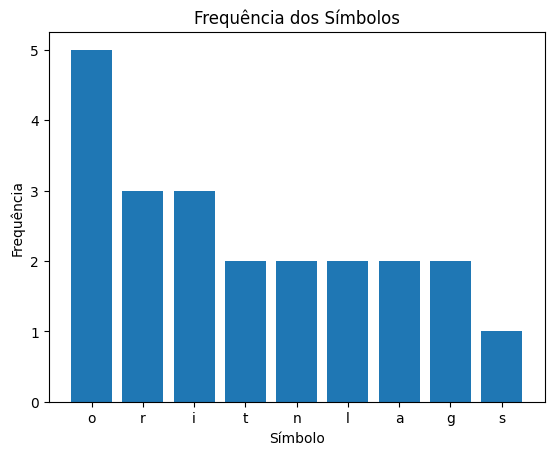

In [19]:
# gráfico das frequências
dic = {'o': 5, 'r': 3, 'i': 3, 't': 2, 'n': 2, 'l': 2, 'a': 2, 'g': 2, 's': 1}

plt.bar(dic.keys(), dic.values())
plt.xlabel('Símbolo')
plt.ylabel('Frequência')
plt.title('Frequência dos Símbolos')
plt.show()

O algoritmo de Huffman foi corretamente implementado. A ordem dos códigos pode variar relativamente aos exemplos fornecidos nos slides, o que é normal, pois o algoritmo admite múltiplas soluções válidas para um mesmo conjunto de frequências.

### Exercício 2

In [20]:
def encode_huff(mensagem, tabela):
    """Dada uma mensagem e a tabela do ponto anterior, retorna uma sequência de bits com mensagem codificada.
    
    Args:
        mensagem (String): mensagem a codificar
        tabela (dicionário): tabela gerada com gen_huff_table
        
    Returns:
        Mensagem codificada em bits
    """
    mensagem_codificada = ''.join(tabela[simbolo] for simbolo in mensagem) # percorre cada simbolo da mensagem, substitui esse simbolo pelo codigo correspondente na tabela e junta numa unica string de bits.
    bits_total = len(mensagem_codificada) # calcular numero total de bits na mensagem (tamanho da string)
    return mensagem_codificada, bits_total # retorna string de bits com a mensagem codidificada + numero de bits total dessa mensagem
    

In [21]:
#exemplo de uso
mensagem_codificada, tamanho_total = encode_huff(mensagem=mensagem, tabela=tabela)

print("Tabela de Huffman")
for simbolo, codigo in tabela.items():
    print(f"{simbolo}: {codigo}")
    
print(f"\nMensagem codificada: \n{mensagem_codificada}")
print(f"\nTamanho total da mensagem codificada em bits: {tamanho_total}")

Tabela de Huffman
o: 01
i: 100
n: 000
r: 101
t: 001
a: 1101
g: 1110
l: 1111
s: 1100

Mensagem codificada: 
01010101011011011011001001000010010000001111111111011101111011101100

Tamanho total da mensagem codificada em bits: 68


Esta função codificou corretamente a mensagem original, respeitando os códigos Huffman atribuidos a cada simbolo. Verifica-se que a mensagem, originalmente composta por 22 letras, foi comprimida para 68 bits.

### Exercício 3

In [22]:
def decode_huff(mensagem_codificada, tabela):
    """
    Dada uma sequência de bits e a tabela gerada com a primeira função, retornar uma sequência de símbolos.
    Garante que a mensagem retornada é igual à mensagem dada como parâmetro de entrada da função anterior.
    
    Args:
        mensagem_codificada (String): mensagem codificada acima
        tabela (dict): Dicionário de huffman
        
    Returns:
        Mensagem sequência de símbolos
    """
    # inverter tabela para mapear codigos a simbolos
    tabela_invertida = {codigo: sim for sim, codigo in tabela.items()} # cria um novo dicionario onde chave = codigo huffman, valor = simbolo correspondente (literal inverter tabela)
    descodificada = "" # string que vai armazenar mensagem descodificada
    buffer = "" # string temporaria para ir acumulando os bits até formar um codigo completo
    for bit in mensagem_codificada: # iterar por cada bit (0 ou 1) da string
        buffer += bit # adicionar bit ao buffer
        if buffer in tabela_invertida: # se sequencia de bits acumulada no buffer exste como chave na tabela invertida
            # se sim, encontramos um codigo de huffman
            descodificada += tabela_invertida[buffer] # adicionar simbolo à string
            buffer = "" #esvaziar buffer
    return descodificada
    

In [23]:
# exemplos de uso
mensagem_descodificada = decode_huff(mensagem_codificada=mensagem_codificada, tabela=tabela)
print(mensagem_descodificada)

ooooorrriiittnnllaaggs


Esta função conseguiu reconstruir a mensagem original a partir da sequência de bits codificada e da tabela de Huffman. A mensagem descodificada coincide com a mensagem inicial, confirmando assi, o bom funcionamento do processo de compressão e descompressão

### Exercício 4

In [24]:
def encode_huff_table(tabela):
    """
    Dada a tabela huffman do ponto 1, retorna uma sequência de bits correspondente à tabela codificada
    Args:
        tabela: Tabela do ponto 1
    
    Returns:
        String binária com a tabela codificada
    """
    tabela_codificada = "" # string onde será armazenada a representação binária da tabela inteira
    for simbolo, codigo in tabela.items(): # iterar sobre cada par simbolo-codigo da tabela
        if isinstance(simbolo, int): # se simbolo for numero inteiro
            # converte para binario de 8 bits
            simbolo_bin = format(simbolo, '08b') #simbolo em 8 bits ascii
        else:
            # se for uma letra ou caractere, usa ord() para obter o codigo ASCII e depois converte para binário com 8 bits
            simbolo_bin = format(ord(simbolo), '08b')
        tamanho_codigo_bin = format(len(codigo), '05b') # comprimento do código em 5 bits -> é suficiente para representar comprimento de até 31.
        tabela_codificada += simbolo_bin + tamanho_codigo_bin + codigo # juntar tudo
    return tabela_codificada

Se a tabela for:

{'A': '101', 'B': '00'}
A função vai produzir:

0100000100011101   (A → 01000001, tamanho 3 → 00011, código 101)
0100001000010000   (B → 01000010, tamanho 2 → 00010, código 00)
Concatenado:

01000001000111010100001000010000

In [25]:
# exemplos de uso
sequencia_tabela = encode_huff_table(tabela=tabela)
sequencia_final = sequencia_tabela + mensagem_codificada
print("Sequência codificada da tabela:")
print(sequencia_tabela)

print("\nSequência final (tabela + mensagem):")
print(sequencia_final)

print(f"\nTamanho total: {len(sequencia_final)} bits")


Sequência codificada da tabela:
011011110001001011010010001110001101110000110000111001000011101011101000001100101100001001001101011001110010011100110110000100111101110011001001100

Sequência final (tabela + mensagem):
01101111000100101101001000111000110111000011000011100100001110101110100000110010110000100100110101100111001001110011011000010011110111001100100110001010101011011011011001001000010010000001111111111011101111011101100

Tamanho total: 215 bits


Esta função permite adicionar a tabela de huffman ao inicio da mensagem codificada, garantido que o recetor consiga decifrar os códigos mesmo sem conhecer previamente a tabela. 
Este resultado também demonstra como o armazenamento da tabela afeta o tamanho total do ficheiro codificado, neste caso, a tabela representa uma parte significativa

### Exercício 5

In [ ]:
def write2file(mensagem_codificada, nome_ficheiro):
    """
    dada uma mensagem codificada e o nome do ficheiro, escrebe a sequência de bits para o ficheiro.
    
    Args:                                              
        mensagem_codificada (String): Mensagem codificada acima.
        nome_ficheiro (String): Nome a guardar para o ficheiro.
        
    Returns:
        Ficheiro txt(?) com a mensagem.
    """
    with open(nome_ficheiro, 'w') as f: # abre ou cria o ficheiro no modo write. usa with para garantir que é fechado no final
        if isinstance(mensagem_codificada, dict): # verifica se o uq efoi passado é um dicionario
            for simbolo, codigo in mensagem_codificada.items(): # para cada simbolo, codigo
                f.write(f"{simbolo}: {codigo}\n") # escreve uma linha no ficheiro no formato simbolo: codigo
        else:
            # caso contrário, escreve diretamente a string no ficheiro
            f.write(mensagem_codificada)
    
    

In [ ]:
  # exemplos de uso
write2file(mensagem_codificada=mensagem_codificada, nome_ficheiro="mensagem.txt") # sequencia de bits
write2file(tabela, "tabela_huffman.txt")


A função permite guarda tanto a sequência de bits de mensagem como a tabela de huffman em ficheiros .txt, o que é essencial para a persistência de dados e transmissão de informação em sistemas de compressão.

### Exercício 6

In [ ]:
def read_file(nome_ficheiro):
    """
    Dado o nome do ficheiro, le uma sequência de bits (tabela codificada e mensagem codificada) contida no ficheiro e descodifica
    a tabela.
    
    Args:
        nome_ficheiro (String): nome do ficheiro a ler
        
    Returns:
        Retorna a tabela descodificada assim como a sequência binária correspondente à mensagem codificada.
    """
    with open(nome_ficheiro, 'r') as f: # ler richeiro
        data = f.readlines()
    
    if '---' in data: # se houver separador
        tabela_str, mensagem_codificada = data.split('---', 1) # divide o conteúdo do ficheiro em dois blocos: tabela_str-> string até ao separador, mensagem_codificada -> o resto
        tabela = {} # dicionario vazio onde será armazenada a tabela de huffman descodificada
        for linha in tabela_str.splitlines(): # iterar cada linha de string 
            linha = linha.strip() # remove espaços/brancos do inicio e do fim da linha
            if linha: # se a linha não estiver vazia
                try:
                    #tenta dividr em duas partes pelo separador ':'
                    simbolo, codigo = linha.split(': ', 1) # simbolo -> antes de :, codigo -> depois de :
                    tabela[simbolo] = codigo # se conseguir, guarda no dicionario
                except ValueError: # se estiver mal formatada
                    pass # passa
        return tabela, mensagem_codificada.replace('\n', '') # retorna o dicionario tabela, a string removendo quebras de linha 
    else:
        # se não houver separador, assume que o conteudo todo é a mensagem codificada
        return {}, data
    


In [29]:
tabela_lida, mensagem_lida = read_file("tabela_huffman.txt")
#print("Mensagem lida: ",mensagem_lida) # está a dar blank

print("Tabela lida:")
for simbolo, codigo in tabela_lida.items():
    print(f"{simbolo}: {codigo}")

print("Mensagem codificada:")
print(mensagem_lida)

Tabela lida:
Mensagem codificada:
['o: 01\n', 'i: 100\n', 'n: 000\n', 'r: 101\n', 't: 001\n', 'a: 1101\n', 'g: 1110\n', 'l: 1111\n', 's: 1100\n']


### Exercício 7

In [1]:
# ler um dos ficheiros

# ==== LENA COLOR ====
x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/LenaColor.tif", dtype=np.uint8)

# ==== LENA GRAY ====
#x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/LenaGray.tif", dtype=np.uint8)

# ==== DecUniversalDH.pdf ====
#x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/DecUniversalDH.pdf", dtype=np.uint8)

# ==== DecUniversalDH.txt ====
#x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/DecUniversalDH.txt", dtype=np.uint8)

# ==== HenryMancini-PinkPanther30s.mp3 ====
#x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/HenryMancini-PinkPanther30s.mp3", dtype=np.uint8)

# === HenryMancini-PinkPantherC.mid ====
#x = np.fromfile("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/HenryMancini-PinkPantherC.mid", dtype=np.uint8)


# calcular histograma
h, bins, patches = plt.hist(x, 256, [0, 256])

# gerar código huffman
to = time()
tabela_codigo = gen_huff_table({i: 1 for i in range(256)})

t1 = time()
print("Time: ", t1 - to)

# codificar a mensagem
seq_bit0,_ = encode_huff(x, tabela_codigo)

# codificar tabela
seq_bit1 = encode_huff_table(tabela_codigo)

# concatenar sequencia de bits fa tabela e da mensagem
sequencia_final = seq_bit1 + "---" + seq_bit0

# nome do ficheiro
filename = "compressao.txt"

# escrver ficheiro
write2file(mensagem_codificada=sequencia_final, nome_ficheiro=filename)

# cronometro 
t2 = time()
print("Time: ", t2 - t1)

# ler ficheiro e descodificar a tabela
tabela_codigo, seq_bit1 = read_file(filename)

# descodificar mensagem com a tabela lida
decoded_bits = decode_huff(mensagem_codificada=mensagem_lida, tabela=tabela_lida)

# converter sequência binária para inteiros 8 bits cada
decoded_array = np.array([int(decoded_bits[i:i+8], 2) for i in range (0, len(decoded_bits), 8)], dtype=np.uint8)

# comparar os primeiros 100 pixeis originais com os descodificados
print("Primeiros 100 pixels originais: ", x[:100])
print("Primeiros 100 pixels descodificados: ", decoded_array[:100])

# descodificar mensagem
yi = decode_huff(seq_bit1, tabela_codigo)
t3 = time()
print("Time: ", t3 - t2)


size_ini = path.getsize("/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP3/dados-CSM-TP3-Huffman/LenaColor.tif") # mudar a cada vez
size_end = path.getsize(filename=filename)
print("Taxa de compressão: {:.2f}".format(size_ini / size_end))

# calcular entropia, media de bits e eficiencia
hist,_ = np.histogram(x, bins=256, range=(0,256))
p = hist/np.sum(hist)

# exclui valores zero para evitar
p_nonzero = p[p > 0]
entropia = -np.sum(p_nonzero * np.log2(p_nonzero))
print("Entropia (bits por simbolo) _ {:.4f}".format(entropia))

# media de bits por símbolo na codificação efetiva
media_bits = len(seq_bit0) / len(x)
print("Média de bits por símbolo: {:.4f}".format(media_bits))

# Eficiência: razão entre entropia e média_bits (em %)
eficiencia = (entropia / media_bits) * 100
print("Eficiência: {:.2f}%".format(eficiencia))

NameError: name 'np' is not defined

<strong>Usamos o exemplo da LenaColor.tif.</strong> <br>
O tempo para criar a tabela de códigos de Huffman com as frequências iniciais foi muito rápido. <br>
O tempo total para codificar a mensagem e guardar os dados no ficheiro comprimido foi cerca de 60 ms, também bastante rápido. <br>
Embora tenhamos tido um problema no array dos primeiros 100 pixeis descodificado, julgamos que será um erro no processo de leitura de ficheiro ou na reconstrução da tabela e sequência de bits a partir do ficheiro. <br>
A taxa de compresão indica que o ficheiro comprimido tem cerca de 12% do tamanho do ficheiro original, ou seja, uma compressão de 88%. <br>
A entropia mede a quantidade mínima média de bits necessários para codificar cada símbolo. Ora, para uma imagem 8-bit, o máximo é 8 bits por símbolo, logo 7.75 é um valor elevado: a imagem tem uma boa variedade de tons. <br>
A média de bits por símbolo de codificação foi 8, ou seja, sem compressão efetiva. Isto confirma que a codificação não foi eficiente. <br>
Por fim, a eficiência que está perto de 100% mostra que a codificação está proxima da entropia ideal, porém, com a média de 8 bits, mostra aqui um desfasamento nos cálculos.